### **Import Dependencies**

In [2]:
import pandas as pd
from fbprophet import Prophet

### **Import CSV Data Files**

In [3]:
calendar_final = pd.read_csv('calendar_final.csv')
calendar_final

,Unnamed: 0,ds,y
0,0,2017-01-01,201.552956
1,1,2017-01-02,164.727980
2,2,2017-01-03,151.504622
3,3,2017-01-04,145.545741
4,4,2017-01-05,142.318020
...,...,...,...
1821,1821,2021-12-27,181.956220
1822,1822,2021-12-28,183.071290
1823,1823,2021-12-29,183.354279
1824,1824,2021-12-30,185.625613


In [5]:
holidays = pd.read_csv('us_holidays.csv')
holidays

,holiday,ds,lower_window,upper_window
0,New Year Day,2017-01-02,0,1
1,Martin Luther King Jr. Day,2017-01-16,0,1
2,Presidents Day (Washingtons Birthday),2017-02-20,0,1
3,Good Friday,2017-04-14,0,1
4,Memorial Day,2017-05-29,0,1
...,...,...,...,...
86,Veterans Day,2023-11-10,0,1
87,Thanksgiving Day,2023-11-23,0,1
88,Christmas Eve,2023-12-24,0,1
89,Christmas Day,2023-12-25,0,1


### **Run Model**

In [ ]:
model = Prophet(holidays=holidays)
model.fit(calendar_final)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Verify the latest dates
calendar_final.tail()

,Unnamed: 0,ds,y
1821,1821,2021-12-27,181.956220
1822,1822,2021-12-28,183.071290
1823,1823,2021-12-29,183.354279
1824,1824,2021-12-30,185.625613
1825,1825,2021-12-31,188.902854


In [ ]:
# Create dataframe for the future dates for the next 2 years
future_df = model.make_future_dataframe(periods=730)
future_df

,ds
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
...,...
2551,2023-12-27
2552,2023-12-28
2553,2023-12-29
2554,2023-12-30


### **Prediction Outputs**

In [ ]:
# Print prediction outputs
predictions = model.predict(future_df)
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Eve,Christmas Eve_lower,Christmas Eve_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Good Friday,Good Friday_lower,Good Friday_upper,Independence Day,Independence Day_lower,Independence Day_upper,Labor Day,Labor Day_lower,Labor Day_upper,Martin Luther King Jr. Day,Martin Luther King Jr. Day_lower,Martin Luther King Jr. Day_upper,Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year Day,New Year Day_lower,New Year Day_upper,New Year's Eve,New Year's Eve_lower,New Year's Eve_upper,Presidents Day (Washingtons Birthday),Presidents Day (Washingtons Birthday)_lower,Presidents Day (Washingtons Birthday)_upper,Thanksgiving Day,Thanksgiving Day_lower,Thanksgiving Day_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,154.755209,147.190198,161.371286,154.755209,154.755209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.854032,-0.854032,-0.854032,0.000000,0.000000,0.000000,-1.038940,-1.038940,-1.038940,0.184908,0.184908,0.184908,0.0,0.0,0.0,153.901177
1,2017-01-02,154.768651,157.158405,171.766627,154.768651,154.768651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.474773,12.474773,12.474773,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.892367,9.892367,9.892367,12.474773,12.474773,12.474773,-1.610611,-1.610611,-1.610611,-0.971795,-0.971795,-0.971795,0.0,0.0,0.0,164.661018
2,2017-01-03,154.782093,150.276071,164.265283,154.782093,154.782093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.664344,6.664344,6.664344,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.830527,2.830527,2.830527,6.664344,6.664344,6.664344,-1.632217,-1.632217,-1.632217,-2.201600,-2.201600,-2.201600,0.0,0.0,0.0,157.612620
3,2017-01-04,154.795535,142.683921,156.802416,154.795535,154.795535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.210941,-5.210941,-5.210941,0.000000,0.000000,0.000000,-1.723165,-1.723165,-1.723165,-3.487777,-3.487777,-3.487777,0.0,0.0,0.0,149.584593
4,2017-01-05,154.808977,141.256138,155.303931,154.808977,154.808977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.664578,-6.664578,-6.664578,0.000000,0.000000,0.000000,-1.852027,-1.852027,-1.852027,-4.812551,-4.812551,-4.812551,0.0,0.0,0.0,148.144399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2023-12-27,183.747186,148.641416,220.804957,147.724682,215.540449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.037132,3.037132,3.037132,0.000000,0.000000,0.000000,-1.723165,-1.723165,-1.723165,4.760296,4.760296,4.760296,0.0,0.0,0.0,186.784318
2552,2023-12-28,183.756363,148.977572,217.326815,147.690908,215.661665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.410437,2.410437,2.410437,0.000000

### **Prediction Graphs**

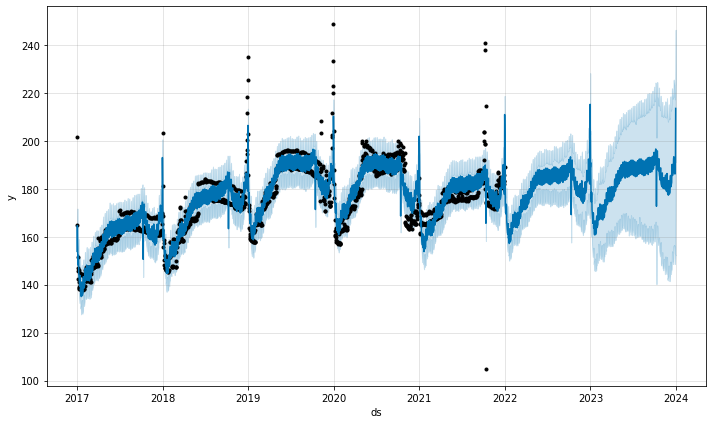

In [ ]:
all_year = model.plot(predictions)

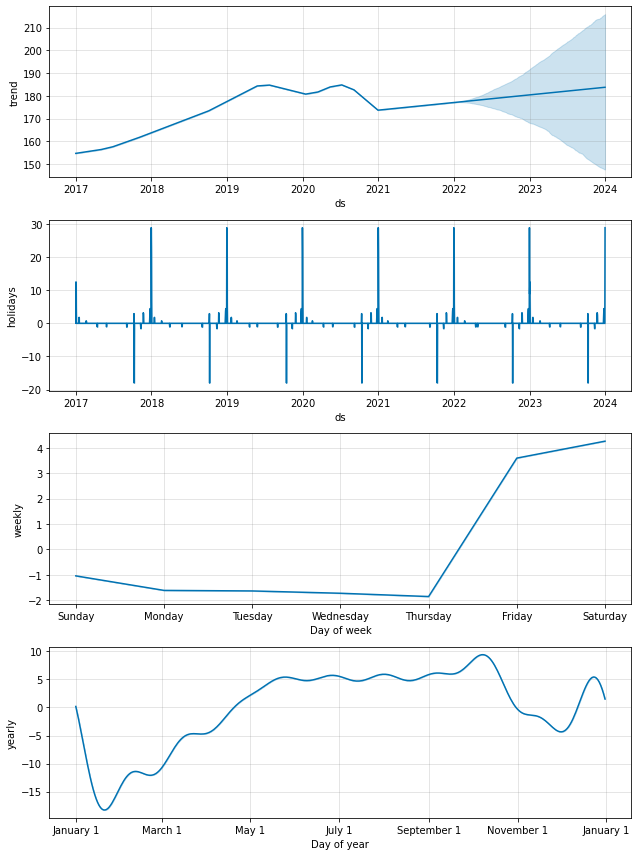

In [ ]:
components = model.plot_components(predictions)

In [ ]:
metric_df = predictions.set_index('ds')[['yhat']].join(calendar_final.set_index('ds').y).reset_index()

In [ ]:
metric_df.tail()

,ds,yhat,y
2551,2023-12-27,186.784318,NaN
2552,2023-12-28,186.166800,NaN
2553,2023-12-29,190.991426,NaN
2554,2023-12-30,190.906204,NaN
2555,2023-12-31,213.552103,NaN


In [ ]:
metric_df.dropna(inplace=True)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(metric_df.y, metric_df.yhat)

0.837502735750874

In [ ]:
mean_squared_error(metric_df.y, metric_df.yhat)

31.84550679769043

In [ ]:
mean_absolute_error(metric_df.y, metric_df.yhat)

3.385085127043119